# Webscraping Project on Job list 

## Scraping Data Scientist Jobs from Indeed all Over INDIA

<u>Website URL:https://in.indeed.com/
    
<img 
src="https://www.everplans.com/sites/default/files/styles/750wide/public/indeed-750.jpg?itok=AbPkMfyY"
alt="indeed" style="float: left; margin-right: 30px;" /> 

Indeed is one of the **'best-rated and highly recommended'** website for **Job Hunts**. **'It'** also allows job seeker to review the ratings given to an organisations regarding their work culture and ethics, pros and cons of organisations rated by "Current Employees" & "Ex-Employees"  . 

It also provides an useful insight for the salary/packages provided by the organisation for a specific JOB role. 

In this project, we will be scrapping the "Data Scientist & Related" jobs available within India that is listed under  **Indeed** and save the data scraped from the website into a .csv file format.

### Project Outline

- Download the webpage using requests
- Parse the HTML source code using beautiful soup
- Extract the details regarding the Job-posting, job role, location, salary packages, etc.
- Compile the extracted information into Python lists and dictionaries
- Extract information from multiple pages.
- Save the extracted information to a CSV file.



In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="webscraping-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "singh-pankaj0018/webscraping-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/singh-pankaj0018/webscraping-project


'https://jovian.ai/singh-pankaj0018/webscraping-project'

### Let's import the neccessary Libraries-


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

### Let's Download the website content using Requests Library

The Requests Library allows us to send HTTP requests to the website server to download the content.

In [4]:
url="https://in.indeed.com/jobs?q=data%20scientist&l=India"

In [5]:
response=requests.get(url)

### Let's check the response of the requests
- The response of the requests.get() should be in between 200 to 299 to successfully download the web contents.
- The response status can be checked by **status_code**

In [6]:
response.status_code

200

In [7]:
with open('webpage.html','w') as f:
    f.write(response.text)

Use Beautiful Soup to extract and Parse the information

### Let;s convert the response into the Beautiful Soup Object.

In [8]:
doc= BeautifulSoup(response.text,'html.parser')

In [9]:
type(doc)

bs4.BeautifulSoup

Now we will use the Inspect Functionality of the browser where we have opened the website to retrieve the data.



The Beautiful Soup "doc "object have several functionality for retrieval of data/information.

In [10]:
doc.title

<title>Indeed Data Scientist Jobs, Employment in India | Indeed.com</title>

In [11]:
doc.title.text.strip()

'Indeed Data Scientist Jobs, Employment in India | Indeed.com'

### Objective

### Our main aim is to retrieve all the information given about the Data Scientist Job posted within India.

#### 1- Let's retreive the Job Title`

In [12]:
Job_title=doc.find_all('div',class_="heading4 color-text-primary singleLineTitle tapItem-gutter")

In [13]:
len(Job_title)

15

In [14]:
job_title_tag=Job_title[5].find('span').text

In [15]:
Job_title[0].text

'newData Scientist'

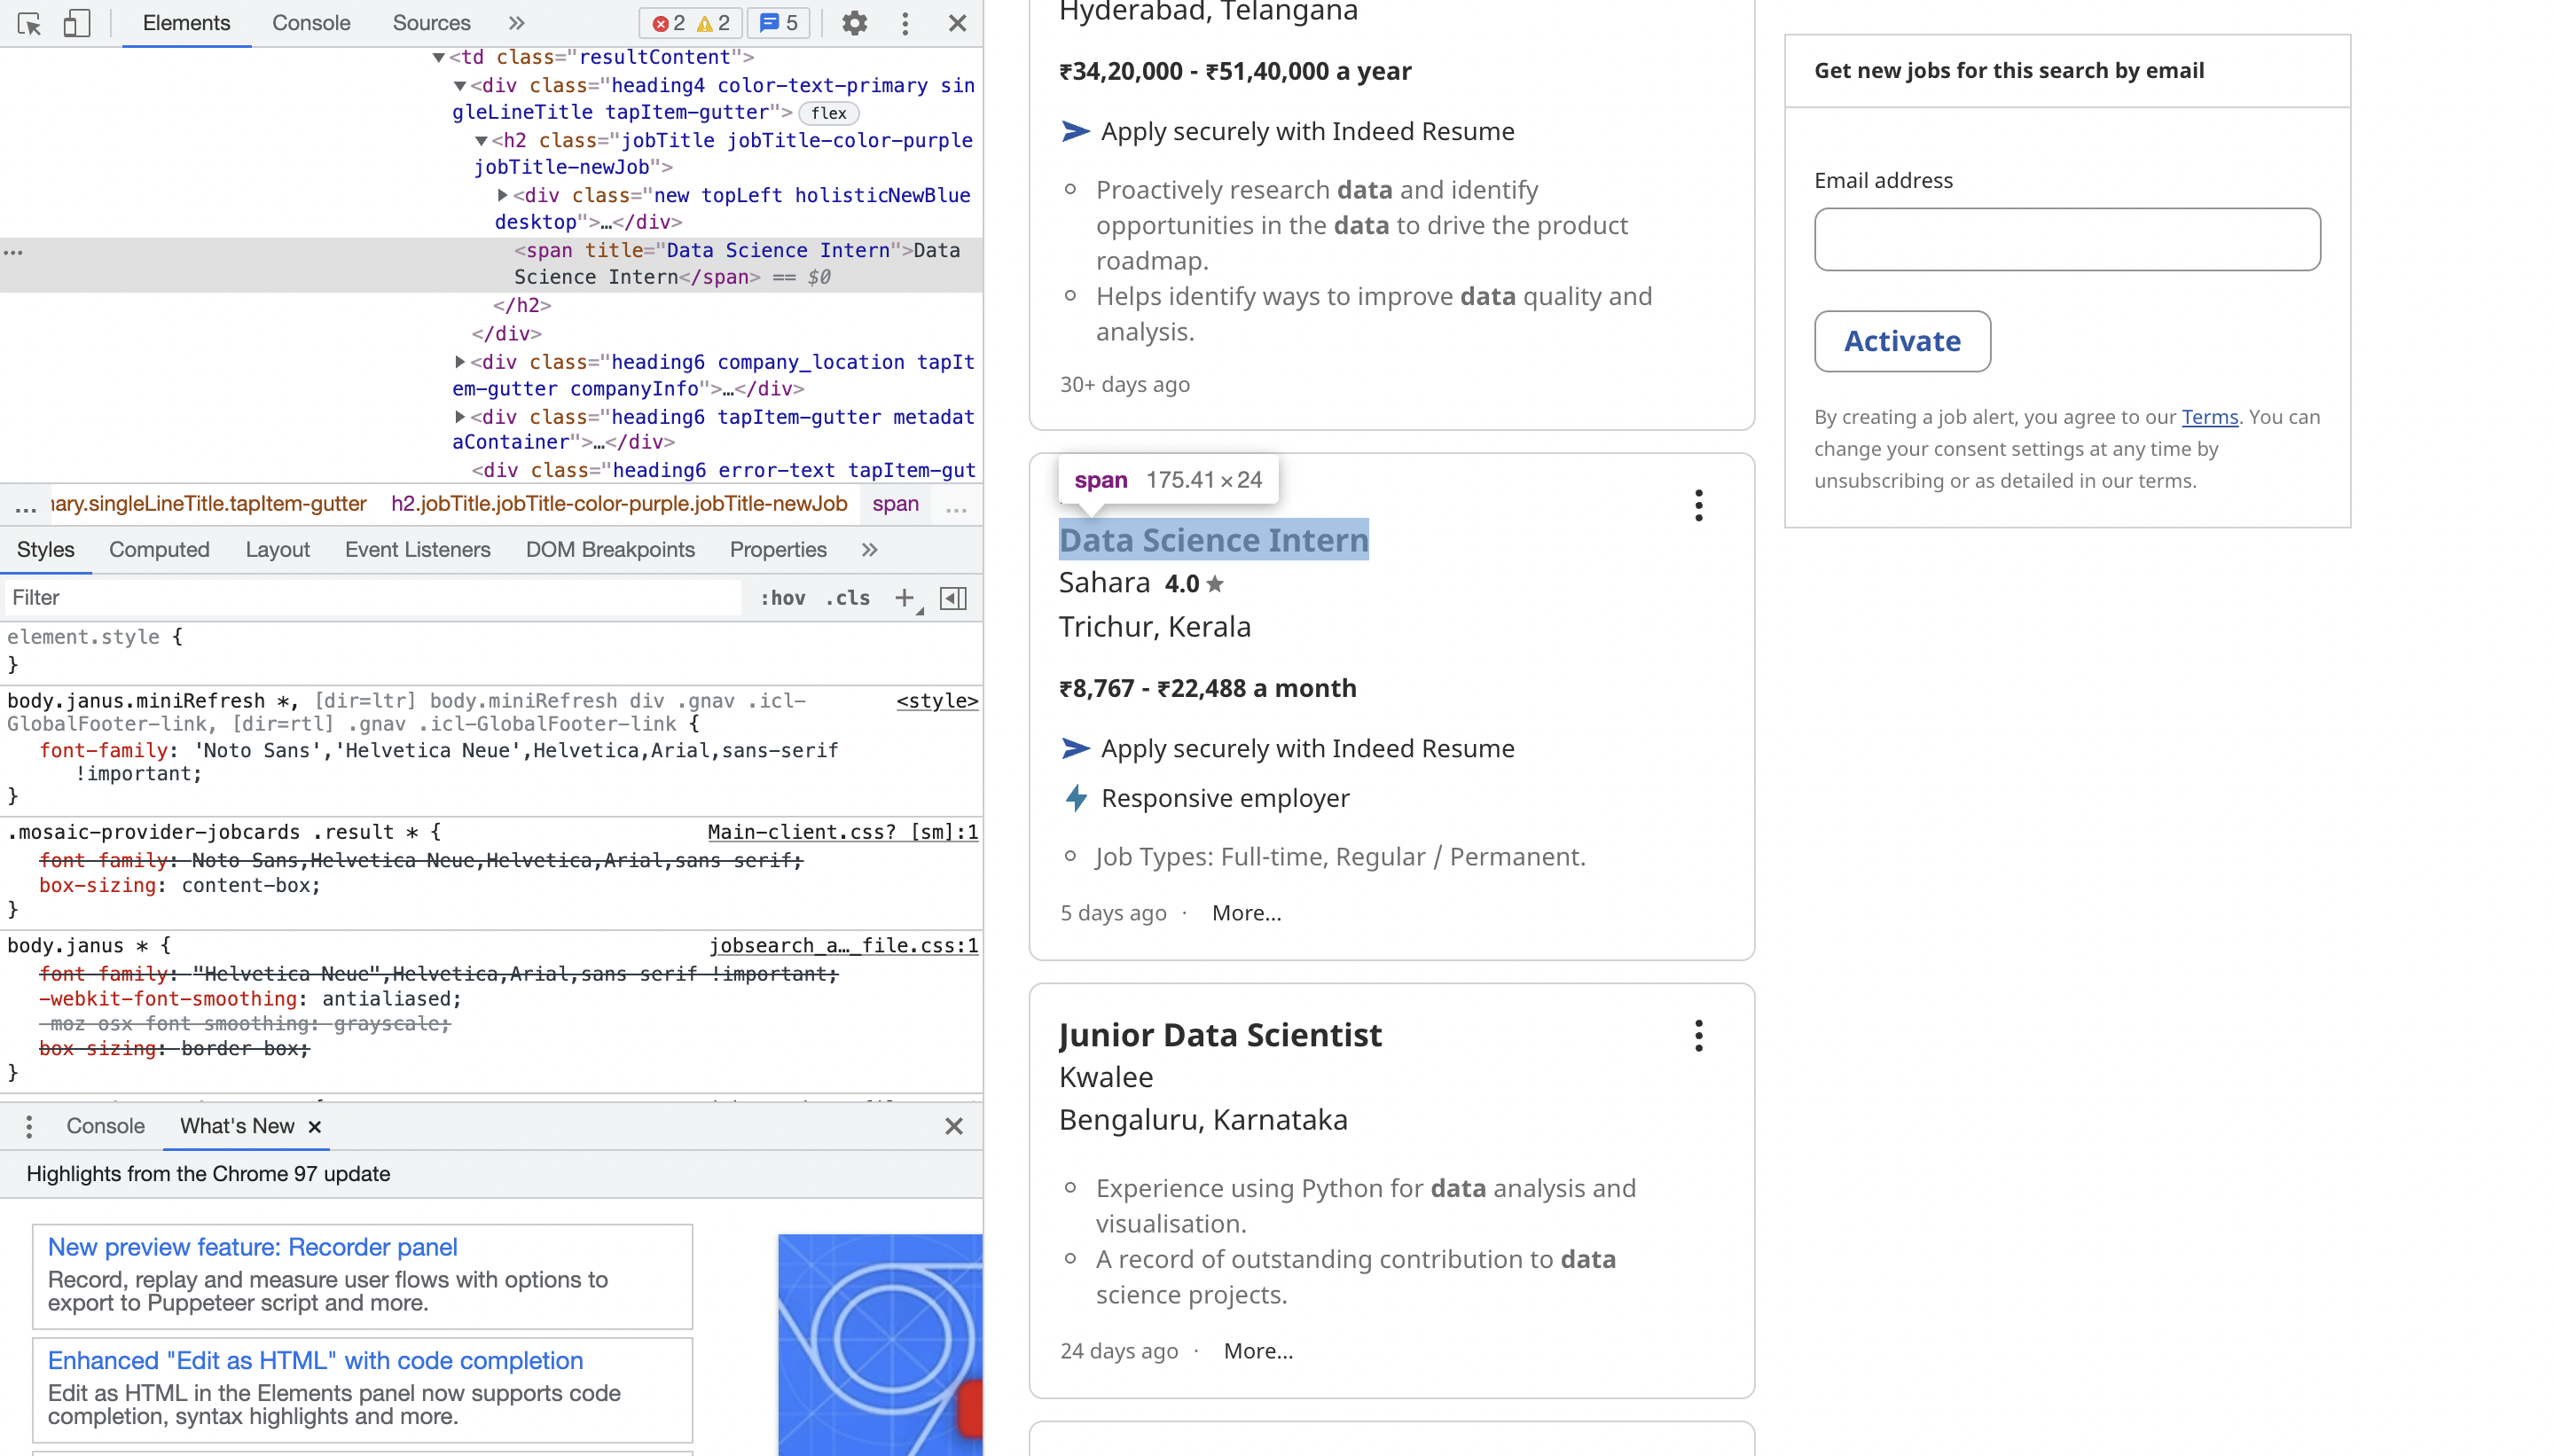

###### Function to download all Job Titles-

In [16]:
def get_title(Soup):
    Job_title=Soup.find_all('div',class_="heading4 color-text-primary singleLineTitle tapItem-gutter")
    Job_Heading=[]
    for i in range(len(Job_title)):
        name=Job_title[i].text.strip('new')
        Job_Heading.append(name)
    return Job_Heading

##### 2- Let's retrieve the Organisation Name- 

In [17]:
org_name=doc.find_all('div',class_="heading6 company_location tapItem-gutter companyInfo")

In [18]:
org_tag=org_name[0].find('span').text

In [19]:
org_tag

'Rolls-Royce'

######  Function to get all the Organisation Names-

In [20]:
def get_org_details(Soup):
    org_name=Soup.find_all('div',class_="heading6 company_location tapItem-gutter companyInfo")
    Company=[]
    for i in range(len(org_name)):
        name=org_name[i].find('span').text
        split=name.strip(".")
        Company.append(split)
    return Company

##### 3- Let's retrieve the Job Location- 

In [21]:
location=doc.find('div',class_="companyLocation").text

In [22]:
len(location)

20

In [23]:
location

'Bengaluru, Karnataka'

###### Function to get the detail of Location -

In [24]:
def get_location(Soup):
    location_tag=Soup.find_all('div',class_="companyLocation")
    Loc=[]
    for i in range(len(location_tag)):
        name=location_tag[i].text
        Loc.append(name)
    return Loc

##### 4- Rating of the organisation-

In [25]:
rating=doc.find_all('span',class_="ratingNumber")

In [26]:
rating

[<span aria-label="4.0 of stars rating" class="ratingNumber" role="img"><span aria-hidden="true">4.0</span><svg aria-hidden="true" class="starIcon" fill="none" height="12" role="presentation" viewbox="0 0 16 16" width="12" xmlns="http://www.w3.org/2000/svg"><path d="M8 12.8709L12.4542 15.5593C12.7807 15.7563 13.1835 15.4636 13.0968 15.0922L11.9148 10.0254L15.8505 6.61581C16.1388 6.36608 15.9847 5.89257 15.6047 5.86033L10.423 5.42072L8.39696 0.640342C8.24839 0.289808 7.7516 0.289808 7.60303 0.640341L5.57696 5.42072L0.395297 5.86033C0.015274 5.89257 -0.13882 6.36608 0.149443 6.61581L4.0852 10.0254L2.90318 15.0922C2.81653 15.4636 3.21932 15.7563 3.54584 15.5593L8 12.8709Z" fill="#767676"></path></svg></span>,
 <span aria-label="4.0 of stars rating" class="ratingNumber" role="img"><span aria-hidden="true">4.0</span><svg aria-hidden="true" class="starIcon" fill="none" height="12" role="presentation" viewbox="0 0 16 16" width="12" xmlns="http://www.w3.org/2000/svg"><path d="M8 12.8709L12.454

In [27]:
rating[2].text

'4.0'

Here we used TRY and EXCEPT method to make a list of Rating for all the Organisation to be able to add the list into the DataFrame 

In [28]:
info=doc.find_all("div",{"class":"job_seen_beacon"})


###### Function to download the Ratings-

In [29]:
def get_Ratings(Soup):
    Ratings=Soup.find_all('span',class_="ratingNumber")
    Ratings=[]
    for items in info:
        try:
            stars=items.find('span',class_="ratingNumber").text
        except:
            stars="NA"
        Ratings.append(stars)
    return Ratings

##### 5- Complete Job Description-

In [30]:
job_description= doc.find_all('div',class_="job-snippet")

In [31]:
job_description[5]

<div class="job-snippet"><ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;">
<li>Emphasis will be on application of artificial intelligence (AI) systems and predictive modelling techniques across the drug development continuum using…</li>
</ul></div>

In [32]:
ul_data= doc.find('ul',style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;")

In [33]:
ul_data

<ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;">
<li style="margin-bottom:0px;">Chapter connects for sharing best practices with other <b>data</b> <b>scientists</b> in the team.</li>
<li>Experienced in exploring and visualising <b>data</b> using Tableau/PowerBI.</li>
</ul>

In [34]:
len(ul_data)

5

In [35]:
for li in ul_data.find_all("li"):
    print(li.text, end=" ")

Chapter connects for sharing best practices with other data scientists in the team. Experienced in exploring and visualising data using Tableau/PowerBI. 

##### Function to download the JOB description-

In [36]:
def get_description(Soup):
    job_description= Soup.find_all('div',class_="job-snippet")
    Job_des=[]
    for i in range(len(job_description)):
        name=job_description[i].text.strip('\n')
        name1=name.strip('\uf0a7')
        Job_des.append(name1)
    return Job_des

##### 6-Lets get the Job Posting Date

In [37]:
Date=doc.find_all('div',class_="heading6 tapItem-gutter result-footer")

In [38]:
Date[:2]

[<div class="heading6 tapItem-gutter result-footer"><div class="job-snippet"><ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;">
 <li style="margin-bottom:0px;">Chapter connects for sharing best practices with other <b>data</b> <b>scientists</b> in the team.</li>
 <li>Experienced in exploring and visualising <b>data</b> using Tableau/PowerBI.</li>
 </ul></div><span class="date"><span class="visually-hidden">Posted</span>3 days ago</span><span class="result-link-bar-separator">·</span><button aria-expanded="false" class="sl resultLink more_links_button" type="button">More...</button></div>,
 <div class="heading6 tapItem-gutter result-footer"><div class="job-snippet"><ul style="list-style-type:circle;margin-top: 0px;margin-bottom: 0px;padding-left:20px;">
 <li>Identify <b>data</b>, metrics and analyses needs for business partners; Initiate, develop and maintain <b>data</b> pipelines and <b>data</b> models that powers dashboards and data…</li>
 </ul><

In [39]:
len(Date)

15

In [40]:
Date_tag1=Date[0].find('span').text

In [41]:
Date_tag1

'Posted3 days ago'

##### Function to extract the Dates of Job Posting- 

In [42]:
def get_dates(Soup):
    Dates=Soup.find_all('div',class_="heading6 tapItem-gutter result-footer")
    date=[]
    for i in range(len(Date)):
        name=Dates[i].find('span').text.strip("").replace("Posted","")
        name1=name.strip('\uf0a7')
        date.append(name)
    return date

##### 7-Lets extract the salary slab given by the Organisation using Function -

In [43]:
def get_Salary(Soup):
    data_all=Soup.find_all("div",{"class":"job_seen_beacon"})
    salary_data=[]
    for items in data_all:
        try:
            salary=items.find('div',{"class":"salary-snippet"}).text.strip()
        except:
            salary="NA"
        salary_data.append(salary)
    return salary_data

#### Let's Create a function to download the webpage by providing the web url as a parameter

In [44]:
def download_web(url1):
    #To download the webpage
    response=requests.get(url1)
    
    #Checking if the webpage is correctly downloaded or not
    if response.status_code not in range(200,299):
        print('Status code:', response.status_code)
        raise Exception('Fail to load page {}'.format(url1))
    
    #Load webpage using BS4
    doc = BeautifulSoup(response.text, 'html.parser')
    
    return doc

In [45]:
urls="https://in.indeed.com/jobs?q=Data%20Scientist&l=India&vjk=e213b1ed42f96025"
docs=download_web(urls)

In [46]:
type(docs)

bs4.BeautifulSoup

The "**docs**" contains the parsed HTML content downloaded from the website 

### Here we will be creating the list of urls for which we will be scraping the JOBS

#### Machine Learning Job Postings

In [47]:
Machine_learning_list="https://in.indeed.com/jobs?q=Machine%20Learning%20&l=India&vjk=2a619159dec17602"

#### Data Analyst Job Posting 

In [48]:
Data_Analyst_list="https://in.indeed.com/jobs?q=Data%20analyst&l=India&vjk=3fe023dbed0948ab"

#### Artificial Intelligence Jobs


In [49]:
Artificial_intelligence_list="https://in.indeed.com/jobs?q=artificial%20intelligence&l=India&vjk=5555a3fc03b48502"

#### BIG Data





In [50]:
Big_Data_list="https://in.indeed.com/jobs?q=BIG%20Data&l=India&vjk=bba251446d1285bb"

#### Data Engineer

In [51]:
Data_Engineer_list="https://in.indeed.com/jobs?q=Data%20Engineer&l=India&vjk=faeeca4daeef60cf"

#### Research Scientist

In [52]:
Research_Scientist_list="https://in.indeed.com/jobs?q=research%20scientist&l=India"

### Lets Create Data Frame for all the Job Postings

Let's create a list of all the links for which we are creating the dataset.

In [53]:
role_links=[url,Data_Analyst_list,Machine_learning_list,Artificial_intelligence_list,Big_Data_list,Data_Engineer_list,Research_Scientist_list]

###### Function to create the Data Frame from the extracted content for all the JOB titles, Organisation Name and other data 

In [54]:
def details(Soup):
    #Details for JOB Heading
    Job_Heading=get_title(Soup)
    
    #Details for Company Name     
    Company=get_org_details(Soup)
    
    #Getting details for the location of Job-Posting
    Loc=get_location(Soup)
    
    #Getting details for Rating received to the organisation
    Ratings= get_Ratings(Soup)
        
    #Getting details for Complete Job Description
    Job_des=get_description(Soup)

    #Getting the details for the date of Job-Posting
    date=get_dates(Soup)
        
    # Getting the details for the Salary
    salary_data=get_Salary(Soup)

    Columns_names=['JOB-Title','Organinsation','Location','Ratings','Job-Description','Date-of-Posting','Salary']
    Dict_data={
                   'JOB-Title' : Job_Heading,
                   'Organinsation' : Company,
                   'Location' : Loc,
                   'Ratings' : Ratings,
                   'Job-Description' :Job_des,
                   'Date-of-Posting'  :date,
                   'Salary' : salary_data
            }
    Df=pd.DataFrame(Dict_data)
    
    return Df

In [55]:
DF_list=[]
for link in role_links:
    ML_Doc=download_web(link)
    ML=details(ML_Doc)
    Df=pd.DataFrame(ML)
    DF_list.append(Df)

In [57]:
print(DF_list)

[                               JOB-Title             Organinsation  \
0                         Data Scientist                  Coinbase   
1                         Data Scientist                  Barclays   
2   Data Scientist II, Product Analytics             Expedia Group   
3                         Data Scientist                    Maersk   
4                         Data Scientist                 Honeywell   
5                         Data Scientist     Applied Materials Inc   
6                         Data Scientist               Rolls-Royce   
7                         Data Scientist                   Siemens   
8                         Data Scientist                        HP   
9                         Data Scientist                    Ecolab   
10                        Data Scientist                    Kaplan   
11                        Data Scientist                Cliksource   
12                        Data Scientist        Jubilant FoodWorks   
13                 

In [62]:
Data_Frame=pd.concat(DF_list,ignore_index=True)

In [63]:
Data_Frame

,JOB-Title,Organinsation,Location,Ratings,Job-Description,Date-of-Posting,Salary
0,Data Scientist,Coinbase,Remote,4.0,"Identify data, metrics and analyses needs for ...",Today,NA
1,Data Scientist,Barclays,"Chennai, Tamil Nadu",NA,The role will be using cutting edge data scien...,1 day ago,NA
2,"Data Scientist II, Product Analytics",Expedia Group,"Gurgaon, Haryana",4.0,Excellent communicator to tell stories with da...,1 day ago,NA
3,Data Scientist,Maersk,"Mumbai, Maharashtra",4.0,"Methodological approach during data analysis, ...",6 days ago,NA
4,Data Scientist,Honeywell,"Bengaluru, Karnataka+1 location",4.1,Develop new technology in the area of hybrid m...,2 days ago,NA
...,...,...,...,...,...,...,...
100,Associate Scientist - Trai,Pfizer,"Chennai, Tamil Nadu",3.7,Job Family Group: Research and Development.\nJ...,1 day ago,NA
101,SENIOR RESEARCH SCIENTISTS,SHRIRAM INSTITUTE FOR INDUSTRIAL RESEARCH,"Delhi, Delhi",4.1,[Even superannuated scientists can be taken on...,2 days ago,NA
102,Research Scientist - Analytical,PI Industries Ltd,"Udaipur, Rajasthan",NA,Collaborate with team members and cross functi...,14 days ago,NA
103,Sr. Associate / Research Scientist,Colgate-Palmolive,"Mumbai, Maharashtra",3.9,The position is to lead & execute Personal Car...,30+ days ago,NA


### Lets Write the DataFrame into CSV file

In [64]:
Data_Frame.to_csv("INDEED_DATA_SCIENCE_JOBS.CSV",index=False)

In [65]:
pd.read_csv("INDEED_DATA_SCIENCE_JOBS.CSV")

,JOB-Title,Organinsation,Location,Ratings,Job-Description,Date-of-Posting,Salary
0,Data Scientist,Coinbase,Remote,4.0,"Identify data, metrics and analyses needs for ...",Today,NaN
1,Data Scientist,Barclays,"Chennai, Tamil Nadu",NaN,The role will be using cutting edge data scien...,1 day ago,NaN
2,"Data Scientist II, Product Analytics",Expedia Group,"Gurgaon, Haryana",4.0,Excellent communicator to tell stories with da...,1 day ago,NaN
3,Data Scientist,Maersk,"Mumbai, Maharashtra",4.0,"Methodological approach during data analysis, ...",6 days ago,NaN
4,Data Scientist,Honeywell,"Bengaluru, Karnataka+1 location",4.1,Develop new technology in the area of hybrid m...,2 days ago,NaN
...,...,...,...,...,...,...,...
100,Associate Scientist - Trai,Pfizer,"Chennai, Tamil Nadu",3.7,Job Family Group: Research and Development.\nJ...,1 day ago,NaN
101,SENIOR RESEARCH SCIENTISTS,SHRIRAM INSTITUTE FOR INDUSTRIAL RESEARCH,"Delhi, Delhi",4.1,[Even superannuated scientists can be taken on...,2 days ago,NaN
102,Research Scientist - Analytical,PI Industries Ltd,"Udaipur, Rajasthan",NaN,Collaborate with team members and cross functi...,14 days ago,NaN
103,Sr. Associate / Research Scientist,Colgate-Palmolive,"Mumbai, Maharashtra",3.9,The position is to lead & execute Personal Car...,30+ days ago,NaN


### Summary 

In this Project we tried to scrape the different JOBS Posted on the INDEED Portal for INDIA specific region related to DATA SCIENCE field with help of Python libararies -"Pandas","Requests" and "BeautifulSoup".

Post Scraping we stored the information into a DataFrame and CSV format.

### Future Scopes

- We can scrape the Indeed website for a single Particular Job like Data-Scientist using Selenium or Scrapy. 
- We can Scrape the different Job Posted by a Particular Organisation within the DATA SCIENCE and AI related field and get to know about the Job Description and desired skills diffrences.  
- 

### References


1-Tutorial Video on Webscraping using BeautifulSoup-(https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/web-scraping-and-rest-apis)

2.[BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

## References

* [Jovian](https://jovian.ai/) A platform to learn Data Science

* This project is made under the guidence of [Aakash N S](https://aakashns.medium.com/) 

* A Youtube video by `Aakash N S` [Let's Build a Python Web Scraping Project from Scratch | Hands-On Tutorial](https://www.youtube.com/watch?v=RKsLLG-bzEY&t=6677s)

* [BeautifulSoup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
                                 
* [Pandas Documentation](https://pandas.pydata.org/docs/)



1. More on webscraping

    [Jovian tutorial on webscraping](https://jovian.ai/learn/zero-to-data-analyst-bootcamp/lesson/web-scraping-and-rest-apis)      
    [Jovian workshop on webscraping](https://www.youtube.com/watch?v=RKsLLG-bzEY)      
    [Requests documentation](https://docs.python-requests.org/en/master/)     
    [BeautifulSoup documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)  
    
    
2. US Restaurant Industry statistics

   [US restaurant industry facts](https://restaurant.org/research/restaurant-statistics/restaurant-industry-facts-at-a-glance)      
   [restaurant industry statistics](https://upserve.com/restaurant-insider/industry-statistics/) 
   
        
3. Online coding forums, tutorials and repositories

    www.stackoverflow.com      
    www.geeksforgeeks.com  
    www.towardsdatascience.com


In [ ]:
jovian.commit(files=['INDEED_DATA_SCIENCE_JOBS.CSV'])